In [11]:
# ignore warning message if cannot open file
# used for formatting slides, not needed for notes
options(jupyter.plot_mimetypes="image/png")
options(repr.plot.width = 8, repr.plot.height = 3,
        repr.plot.pointsize = 18, repr.plot.antialias = "subpixel", repr.plot.res = 300)

# STATS 306: Introduction to Statistical Computing

## Prof. Jonathan Terhorst

## The book

<img style="float:right; margin: 10px; width: 200px" src="https://d33wubrfki0l68.cloudfront.net/b88ef926a004b0fce72b2526b0b5c4413666a4cb/24a30/cover.png"/>

For most of the semester we will follow the book "R for Data Science" (R4DS) by Hadley Wickham and Garrett Grolemund. The electronic version is available [for free](https://r4ds.hadley.nz). 

**Note**: we are using the **second edition** of the book not the [first edition](https://r4ds.had.co.nz).

## What this course is about
Learning to use R in order to perform:
* Exploratory Data Analysis
    - Data Visualization
    - Data Transformation
* Analyzing different types of data
    - Numerical data
    - Categorical data (factors)
    - Text / strings
    - Dates and times
* Programming topics:
    - Functions
    - Abstraction
    - Vectors / lists
    - Iteration
* Putting it all together to perform statistical inference
    - Regression
    - Model building
    - Hypothesis testing

## What this course is *not* about
This is not a traditional programming course. You will learn to program in R as a byproduct of learning how to visualize, clean, and model data. However we will *not* cover things like:
- Algorithms
- Data structures
- OOP
- etc.

If you find that you enjoy programming and want to go further, these would be good topics to learn about in a future course.

# Poll
My level of programming experience is:
<ol style="list-style-type: upper-alpha;">
    <li>Never programmed before</li>
    <li>I have taken a programming course (EECS 183, ENGR 101, etc.) before</li>
    <li>I have taken several programming courses (EECS 28x, etc.) before</li>
    <li>I code for fun</li>
</ol>

# Goals for today's lecture
- Learn how to begin using Jupyter and R.
- Use R to do basic computations.

## Accessing an R programming enviroment
Everything in this course will be done using [Jupyter notebooks](http://jupyter.org/) running the [R programming language](https://www.r-project.org/). Lecture notes will be distributed in Jupyter notebook format before lecture.
There are several options for running R:
- Jupyter notebook. All of the slides and homeworks are distributed as Jupyter notebooks. There are several ways to get up and running with Jupyter.
  - Easiest/recommended: Use [Google Colab](https://colab.research.google.com).
  - Almost as easy: install [Anaconda](https://www.anaconda.com/products/distribution) (see video instructions [here](https://www.youtube.com/watch?v=C4OPn58BLaU)).
  - Advanced: [install Jupyter using Python `pip`](https://jupyter.org/install), and also install R and `IRKernel`. (If you know what all this means, you don't need our help installing.)
- [RStudio](https://rstudio.org) is another great platform, but unfortunately it does not support editing Jupyter notebooks. Some students like to use RStudio to work on problem sets, and then paste the answers into the notebook.

# What is R
R is a programming language developed by statisticians to perform statistical analysis. The "traditional" way to run R from the Unix command line is by typing the command `R`:

    $ R
    R version 3.5.2 (2018-12-20) -- "Eggshell Igloo"
    Copyright (C) 2018 The R Foundation for Statistical Computing
    Platform: x86_64-apple-darwin17.7.0 (64-bit)

    R is free software and comes with ABSOLUTELY NO WARRANTY.
    You are welcome to redistribute it under certain conditions.
    Type 'license()' or 'licence()' for distribution details.

      Natural language support but running in an English locale

    R is a collaborative project with many contributors.
    Type 'contributors()' for more information and
    'citation()' on how to cite R or R packages in publications.

    Type 'demo()' for some demos, 'help()' for on-line help, or
    'help.start()' for an HTML browser interface to help.
    Type 'q()' to quit R.

    >

We won't use the command line in this class. The Jupyter notebook which runs these slides is running an R "kernel" in the background. Typing commands into these cells is the same as if you had type typed them into the R interpreter:

In [6]:
1 + 1

[1] 2

After typing this code into the notebook, you have to "run" it in order to get the result. You can do this by clicking the "&#x25b6; Run" button in the toolbar above;

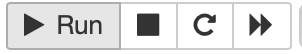

This gets very tedious, so you can also type "Shift-Enter" to run the cell.

## The `tidyverse`
The `tidyverse` is a collection of software packages that we will use to analyze data in R. Because it is not part of "base R", we must first tell R to load these packages before we can use them. We do that by typing:

In [7]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


You should execute this command *every time* you start R. (You only need to run it once per session.) If you don't, most of the code that appear in this lecture notes will not work.

## Analyzing some data
- Unlike a traditional programming course, we are going to "dive right in" immediately begin analyzing data. 
- Don't worry if you don't understand what all of the code that follows does yet -- the goal here is to become comfortable interacting with R. 
- In future lectures, we will unpack all of these commands in great detail.

## Do penguins with longer flippers weigh more or less than penguins with shorter flippers? 
To study this pressing question, we will first need a data set about penguins. The `palmerpenguins` datas Let contains this information. Load it by typing:

```
library(palmerpenguins)
```

In [10]:
# Load the palmer penguins library

Chances are good that you got the following error message:
```
Error in library(palmerpenguins): there is no package called ‘palmerpenguins’
Traceback:

1. library(palmerpenguins)
```
This means that this dataset has not yet been copied onto the computer. To fix this, we need to run:
```
install.packages('palmerpenguins')
```
After running this command, the package `palmerpenguins` now is on your computer, and you can load it by typing `library(palmerpenguins)`.

## Variables

A **variable** is a name that contains a value. You have previously encountered them in a math class: writing
$x = 2$ means that the name $x$ now stands for the number $2$. We use variables to construct **expressions**. For example, $x^2$ is an expression that evaluates to the number $4$. 

In computer programming, variables function similarly, except that they can represent other things besides just numbers. 

After loading `palmerpenguins`, we now have a new variable called `penguins`. If we type it into a notebook and evaluate it, R tells is the *value* of that variable:

In [21]:
# Examine the penguins dataset

## Getting `help()`
We can pretty much guess what this data set is about. All the same, it would be helpful if somebody wrote down a description of the data to eliminate guesswork. Fortunately, that is usually done for us in R. 

In [22]:
# Pull up the help for penguins

(You could also abbreviate this as `?penguins`). The built-in help is **extremely useful** (for example, on exams). You should get in the habit of consulting it when you get stuck.

### Quiz 🤔
In what years(s) was the Penguin study conducted?

<ol style="list-style-type: upper-alpha;">
    <li>2005</li>
    <li>2006</li>
    <li>2007</li>
    <li>2008</li>
    <li>2009</li>
</ol>

## Searching
If you know what you want to do, but don't know the name of the command to do it, you can search the help:

In [7]:
# Search the help for 'correlation'

## Autocompletion
If you cannot remember the name of a variable or function, try typing the first part of it and hitting the `Tab` key on your keyboard:

In [8]:
# Example of tab completion

## Back to penguins
We want to create a visualization that answer the original question: Do penguins with longer flippers weigh more or less than penguins with shorter flippers?  

![pengiuns](https://r4ds.hadley.nz/data-visualize_files/figure-html/unnamed-chunk-7-1.png)

## Functions
A **function** takes one or more *arguments* and returns a *value*. Here are some functions you have encountered in your math class:
\begin{align}
f(x) &= 1 & g(x) &= e^x \\ 
h(x) &= \sin x & r(x, y) &= \sqrt{x^2 + y^2} \\
\end{align}
Functions in programming operate on a similar principle, but the input and output values do not necessarily have to be numbers.

(You could also abbreviate this as `?penguins`). The built-in help is **extremely useful** (for example, on exams). You should get in the habit of consulting it when you get stuck.

## ggplot
To create plots, we'll use an R package called `ggplot`. It comes pre-loaded as part of `tidyverse`. To begin using `ggplot`, we call a **function** called `ggplot()`, with some appropriate arguments.

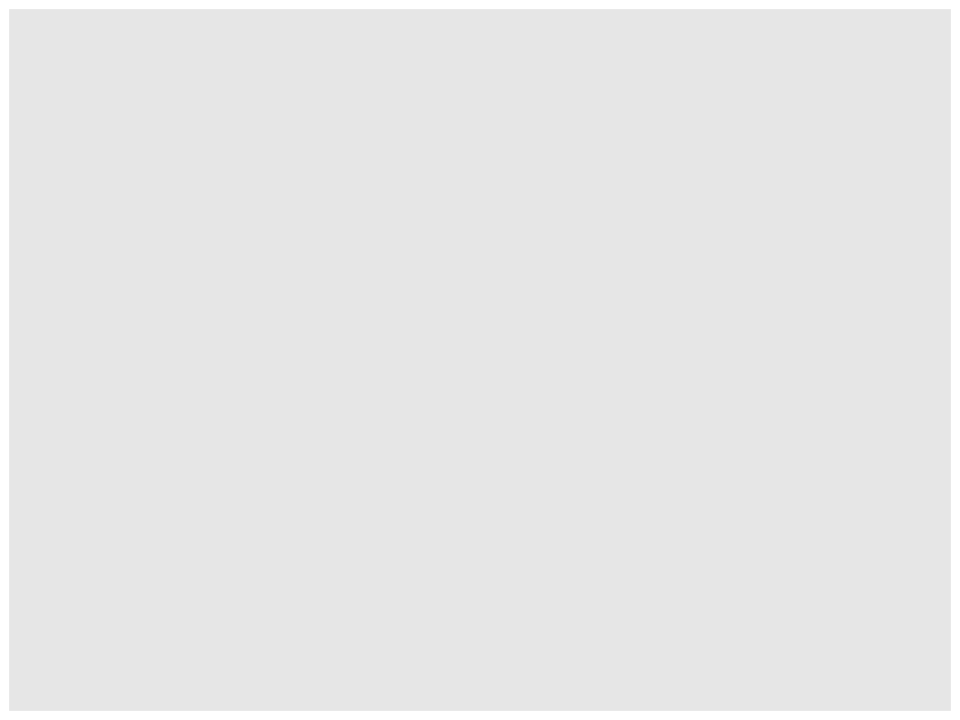

In [32]:
ggplot(data = penguins)

Because we didn't tell it anything about how the plot should look, `ggplot` simply created a blank plot.

## Aesthetics
To tell ggplot how the plot should look, we specify a *mapping* from the *variables* contained in our penguins data set to the $x$ and $y$ axes of the plot.

In [24]:
# Tell ggplot to put flipper_length_mm on the x axis

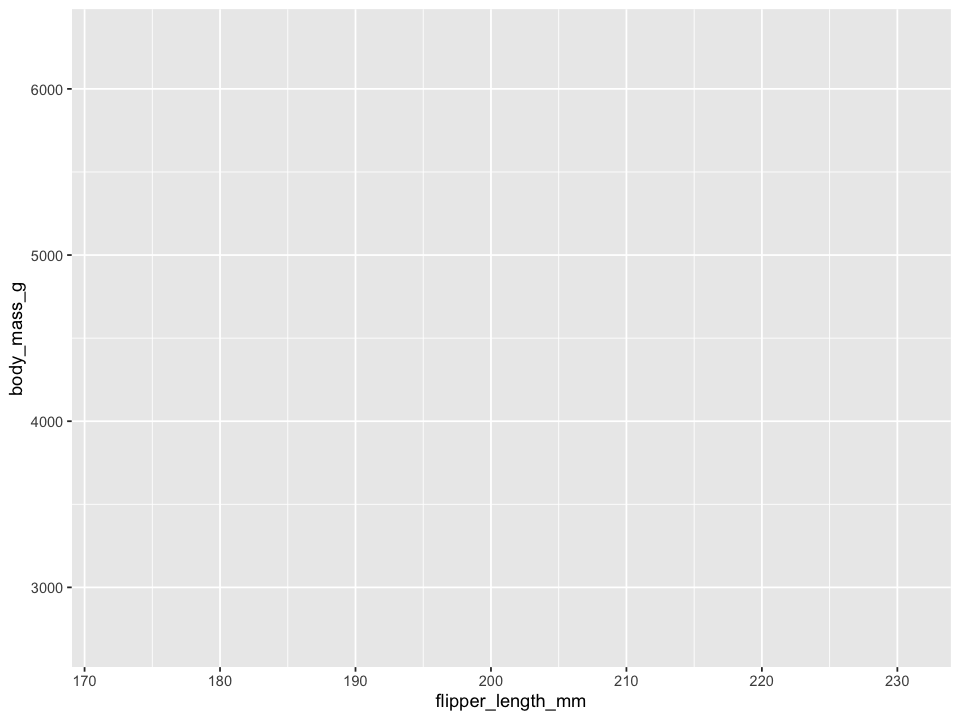

In [33]:
# Tell ggplot to put flipper_length_mm on the x axis and body_mass_g on the y axis
ggplot(data = penguins,
       mapping = aes(x = flipper_length_mm, y = body_mass_g))

All that remains is to add content to the plot. What is an appropriate type of plot for these data?

In [1]:
# Create a scatter plot with flipper_length_mm on the x axis and body_mass_g on the y axis

We seem to have uncovered a trend. But there are also other variables in the data set that we should take into account. For example, there is a variable called `species`, and it could be that some species are just inherently bigger. 

In [10]:
# Color each point in the preceding scatter plot by their species

We could improve this plot a bit by differentiating the species by both color and shape.

In [11]:
# Color each point in the preceding scatter plot by their species, and give each species a different shape

Lastly, we'll add a "line of best fit" to this plot, which is a model for the relationship between the $x$ and the $y$ variables. (In statistics, this is often called a "smoothing line".)

In [12]:
# Plot with multiple smoothing lines

Oops! This was not quite what we were aiming for -- it would be better if one smoothing line was shared amongst all three species. To accomplish this, we need to move the `color=` and `shape=` aesthetics down into the `geom_point()`, which tells R to only apply those aesthetics to the scatter plot portion of the overall plot.

In [13]:
# Plot with a single smoothing line

Finally, there are a couple of other aesthetic details that we should always pay attention to when making plots. Every plot should:
- Have a title.
- Have clearly labeled axes.
- Make clear what the units of the plot are. 

In [14]:
# Plot with correctly labeled axes

## The Flint water crisis

> In April 2014, during a budget crisis, Flint changed its water source from treated Detroit Water and Sewerage Department water (sourced from Lake Huron and the Detroit River) to the Flint River. Residents complained about the taste, smell, and appearance of the water. Officials failed to apply corrosion inhibitors to the water, which resulted in lead from aging pipes leaching into the water supply, exposing around 100,000 residents to elevated lead levels &hellip; **Between 6,000 and 12,000 children were exposed to drinking water with high levels of lead**.

https://en.wikipedia.org/wiki/Flint_water_crisis


In [15]:
load(url('http://datasets.stats306.org/flint.RData'))

This has loaded a data frame into a variable called `flint` containing data from the Flint water crisis:

In [19]:
summary(flint)

 Sample Number      Date Submitted                   Analysis (Lead)   
 Length:23184       Min.   :2015-09-03 11:05:45.00   Length:23184      
 Class :character   1st Qu.:2016-02-01 13:27:43.50   Class :character  
 Mode  :character   Median :2016-02-18 13:07:39.00   Mode  :character  
                    Mean   :2016-02-29 14:05:42.92                     
                    3rd Qu.:2016-03-24 13:34:40.50                     
                    Max.   :2016-06-30 12:40:08.00                     
                    NA's   :13                                         
   Lead (ppb)       Analysis (Copper)   Copper (ppb)       Street #        
 Min.   :    0.00   Length:23184       Min.   :    0.0   Length:23184      
 1st Qu.:    0.00   Class :character   1st Qu.:    0.0   Class :character  
 Median :    1.00   Mode  :character   Median :    0.0   Mode  :character  
 Mean   :   17.09                      Mean   :   98.7                     
 3rd Qu.:    3.00                      3rd Q

Let's do some basic analysis of the Flint water crisis using this data. What are some interesting questions we could ask about this data set?

What is the overall distribution of lead levels? 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 13 rows containing non-finite values (`stat_bin()`).”


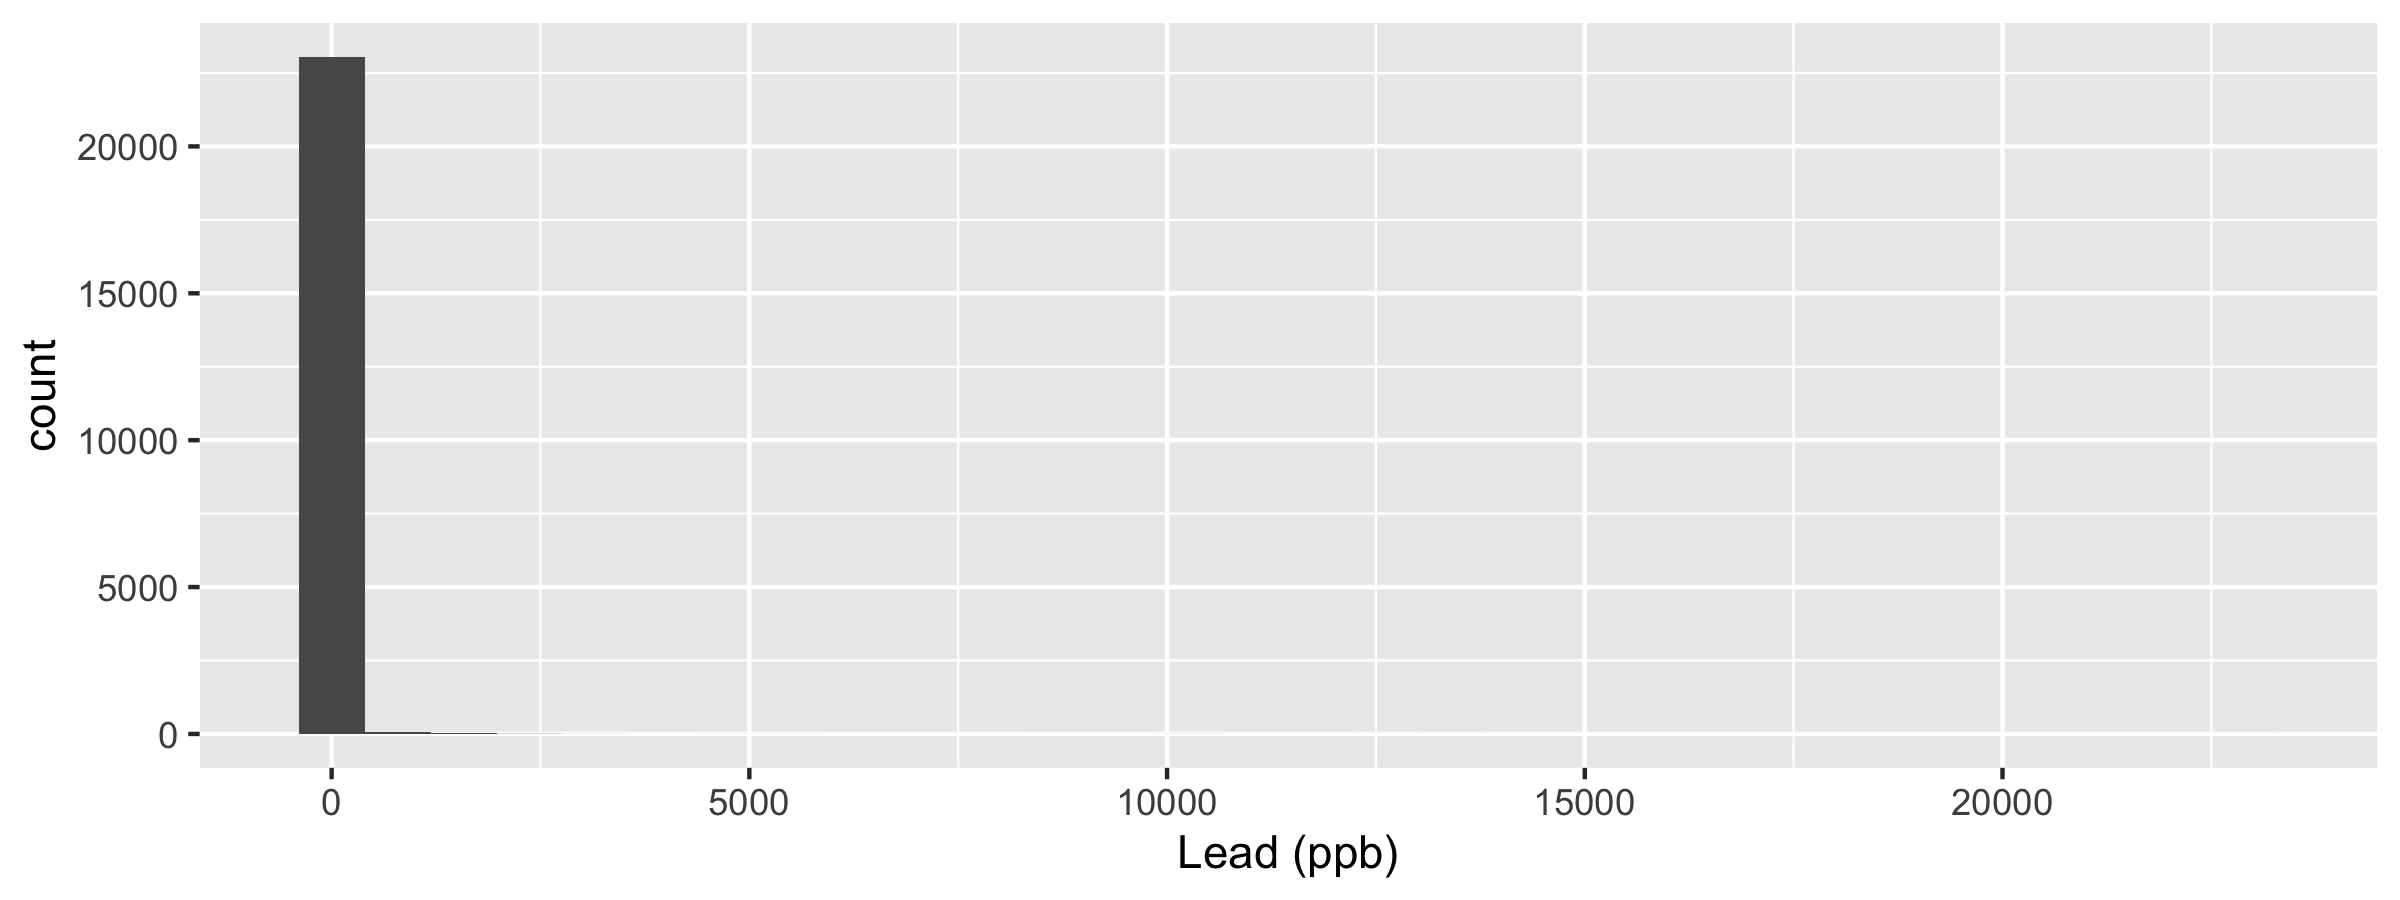

In [12]:
ggplot(flint, aes(x=`Lead (ppb)`)) + geom_histogram()

This plot is not very informative, because some extremely large lead values caused the plot axes to extend all the way to 20000. As a result, almost all the observations are clumped into a single bar at zero.

In [33]:
# Log-transformed histogram

### Quiz 🤔
What is the largest lead value observed in this data set?

<ol style="list-style-type: upper-alpha;">
    <li>5165</li>
    <li>20000</li>
    <li>22905</li>
    <li>22905</li>
    <li><code>NA</code></li>
</ol>

Hint: consider using the `summary()` function.

### Quiz 🤔
The amount of chemical exposure considered safe by the US Environmental Protection Agency is called the maximum contaminant level goal (MCLG). As of today, what is the MCLG for lead in drinking water?

<ol style="list-style-type: upper-alpha;">
    <li>0 ppb</li>
        <li>5 ppb</li>
        <li>10 ppb</li>
        <li>50 ppb</li>
        <li>100 ppb</li>
</ol>

Hint: Use Google.

Which zip codes were most affected?

In [17]:
sort(table(flint$`Zip Code`))


     45804      48050      48054      48057      48132      48205      48386 
         1          1          1          1          1          1          1 
     48403      48406      48430      48432      48463      48473 48503-1042 
         1          1          1          1          1          1          1 
48503-2640 48503-2719 48503-2812 48503-3535 48503-4524 48503-4601 48503-5314 
         1          1          1          1          1          1          1 
48504-1644 48504-2164 48504-2844 48504-4842  48504-706 48504-7139 48505-1934 
         1          1          1          1          1          1          1 
48505-2551 48505-2564 48505-3327 48505-5164 48506-2665 48506-2680 48506-3506 
         1          1          1          1          1          1          1 
48506-3753 48506-5216 48507-1352 48507-1433 48507-1521 48507-1528 48507-1894 
         1          1          1          1          1          1          1 
48507-2518 48507-2823 48507-5305 48507-5656 48507-6230      485